# Stochastic Gradient Descent Optimization

### 학번: 20191602 배용하, 수치해석 3분반 김상철 교수님

---

## 목차

1. SGD의 개요 및 동작 원리<br>
    1.1. Gradient Descent와 SGD의 정의<br>
    1.2. Gradient Descent와 SGD의 장단점<br>
2. SGD의 동작 코드 및 단위 테스트<br>
    2.1. Keras를 이용한 SGD 구현 방법 및 코드<br>
    2.2. Keras를 이용한 SGD 단위 테스트<br>
    2.3. Keras를 이용한 SGD 시각화<br>
3. SGD의 구체화<br>
    3.1. Numpy를 이용한 SGD 구체화<br>
4. 구체화한 모듈의 단위 테스트<br>
    4.1. Numpy를 이용한 SGD 단위 테스트<br>
5. Rosenbrock Function을 통한 SGD 성능 검증<br>

---

## 1. SGD의 개요 및 동작 원리

**Stochastic Gradient Descent(SGD)** 를 이야기하기 전에, Gradient Descent에 대해서 먼저 이야기합니다.

### 1.1. Gradient Descent와 SGD의 정의

기존의 Gradient Descent에서의 값 변화는 아래 식과 같습니다.

$$
\theta = \theta - \eta \nabla_\theta J(\theta)
$$

$\eta$는 learning rate이면서 step size이다.

여기서, 오차함수 $J(\theta)$를 계산할 때, 모든 Training Set를 사용한다면, **Batch Gradient Descent**입니다.

하지만, 모든 Training Set이 아니라 일부의 Training Set를 사용한다면, **Mini-Batch Gradient Descent**라고 할 수 있습니다.

Training Set에서 한 개의 데이터만을 추출한다면, **Stochastic Gradient Descent**라고 할 수 있습니다.

엄격하게 따지자면, SGD와 Mini-Batch Gradient Descent는 다른 알고리즘입니다. (참조: https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a)

여기서는 SGD에 대해서 다루고 있으므로, Mini-Batch Gradient Descent의 설명은 생략합니다.

### 1.2. Gradient Descent와 SGD의 장단점

Gradient Descent는 Training Set를 전부 사용하므로, 속도는 느려질 수 있지만, 안정적으로 Optimal로 수렴한다.

SGD는 Training Set의 일부만 사용하므로, Optimal에 불안정하게 수렴할 수 있다.<br>하지만, Gradient Descent처럼 1 step에 모든 Training Set를 다 탐색하고 업데이트하는 것이 아니라, 1개의 Training Data만 가지고 업데이트하기 때문에, 1 step를 진행하는 속도는 Gradient Descent에 비해 SGD가 빠르다.

Gradient Descent는 안정적인 만큼, Local Optima(국소 최적해)에 빠지기 쉽지만, SGD는 변동성이 크기 때문에 Local Optima에 어느정도 빠지지 않는다.<br> 
하지만, Local Optima에 빠지지 않는 만큼 Global Optima(전역 최적해)를 탐색하는 것에 대해서 실패할 수도 있으니 주의해서 learning rate를 설정해야 합니다.<br>
즉, SGD는 변동성이 강하므로 Global Optima에 도달하는 것 역시 Local Optima처럼 쉽게 도달하지 못하기 때문에 Original SGD 대신 변형 알고리즘을 사용합니다.<br>

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile3.uf.tistory.com%2Fimage%2F996A6C395D0E18BB21AF72)

결국은 SGD(Naive Stochastic Gradient Descent)는 Global Optimal에 도달하는 속도는 느리고, 성능이 낮을 수 밖에 없다.

그러한 단점을 보안한 SGD의 변형 알고리즘으로 Momentum, RMSProp, Adam 등이 있습니다.<br>
[https://emiliendupont.github.io/optimization-rosenbrock/](https://emiliendupont.github.io/optimization-rosenbrock/) 를 통해 SGD, Momentum, RMSProp, Adam의 시각화 과정을 볼 수 있습니다.

## 2. SGD의 동작 코드 및 단위 테스트

### 2.1. Keras를 이용한 SGD 구현 방법 및 코드

아래 코드에서는 Keras, Numpy, scikit-learn을 이용한 SGD 구현 코드를 나타내고 있습니다.


**아래 코드에서, ModuleError가 발생할 경우 해결하는 방법**

```python
pip install numpy==1.18
pip install scipy==1.1.0
pip install scikit-learn==0.21.3
```

In [72]:
from sklearn.datasets import make_regression
import numpy as np
import tensorflow as tf

class KerasSGD:
    
    def __init__(self, n_samples, learning_rate = 0.001):
        self.learning_rate = learning_rate
        self.n_samples = n_samples
        self.X, self.Y = self.DataGeneration()
        self.Y = np.expand_dims(self.Y, axis = 1)
        self.model = self.modelGeneration()
        
    def DataGeneration(self):
        return make_regression(n_samples = self.n_samples,
                                n_features = 1,
                                bias = 10.0,
                                noise = 10.0, random_state = 2)
    
    def modelGeneration(self):
        
        # variables definition
        model = tf.keras.Sequential()
        linear = tf.keras.layers.Dense(1, activation = 'linear')
        optimizer = tf.keras.optimizers.SGD(lr = self.learning_rate)
        
        model.add(linear)
        model.compile(loss = 'mse',
                     optimizer = optimizer,
                     metrices = ['mse'])
        
        return model
    
    def Fitting(self, maxsteps):
        self.X_test = self.X[:int(self.n_samples / 4 + 1)]
        self.Y_test = self.Y[:int(self.n_samples / 4 + 1)]
        self.X_train = self.X[int(self.n_samples / 4 + 1):]
        self.Y_train = self.Y[int(self.n_samples / 4 + 1):]
        return self.model.fit(self.X_train, self.Y_train, batch_size = 10,
                      epochs = maxsteps, shuffle = True, validation_data = (self.X_test, self.Y_test))
        
    def evaluateTestData(self):
        return self.model.evaluate(self.X_test, self.Y_test)

### KerasSGD Class

KerasSGD 클래스는 선형 회귀(Linear Regression)을 `tf.keras.optimizers.SGD` 로 구현하는 과정을 보여주고 있습니다.

n_samples는 Sampling Data의 크기를 의미합니다.

DataGeneration는 n_samples만큼의 X, Y의 데이터를 랜덤하게 생성합니다. 여기서, make_regression()은 선형회귀 데이터를 생성합니다.<br>
그리고, `self.Y = np.expand_dims(self.Y, axis = 1)` 의 의미는 무엇일까요?

X의 shape와 Y의 shape를 맞춰주기 위해서 Dimension를 늘리는 것입니다. `[100] -> [100, 1]`

modelGeneration는 keras linear model를 만들고, SGD optimizer를 정의합니다.<br>
lr은 learning rate를 의미합니다. 즉, $\eta$가 lr입니다. 그렇게 모델을 설계완료합니다.

Fitting은 X와 Y를 훈련 데이터와 테스트 데이터로 나뉘어 피팅하는 과정입니다. 훈련 데이터는 75%, 테스트 데이터는 25%로 나뉘어 피팅합니다. epochs는 Max Step를 의미하고, `shuffle = True`은 데이터를 섞는 것을 의미합니다.

또한, evaluateTestData는 학습한 model를 가지고, 아까 분할했던 테스트 데이터를 실험해보는 함수입니다.

### 2.2. Keras를 이용한 SGD 단위 테스트

kerasSGD Initialize

In [94]:
ksgd = KerasSGD(100)

ksgd의 X와 Y의 모양 출력

In [95]:
print(ksgd.X.shape, ksgd.Y.shape)

(100, 1) (100, 1)


In [96]:
# SGD Fitting: maxsteps = 100
print("===================Fitting===================")
hist = ksgd.Fitting(maxsteps = 100)

===================Fitting===================
Train on 74 samples, validate on 26 samples
Epoch 1/100
74/74 [==============================] - 0s 3ms/sample - loss: 4071.9967 - val_loss: 3408.7874
Epoch 2/100
74/74 [==============================] - 0s 336us/sample - loss: 3938.1549 - val_loss: 3292.7692
Epoch 3/100
74/74 [==============================] - 0s 283us/sample - loss: 3804.9760 - val_loss: 3180.8870
Epoch 4/100
74/74 [==============================] - 0s 391us/sample - loss: 3672.8578 - val_loss: 3058.9840
Epoch 5/100
74/74 [==============================] - 0s 337us/sample - loss: 3535.9230 - val_loss: 2950.9554
Epoch 6/100
74/74 [==============================] - 0s 337us/sample - loss: 3412.2826 - val_loss: 2853.5216
Epoch 7/100
74/74 [==============================] - 0s 310us/sample - loss: 3300.9928 - val_loss: 2752.3291
Epoch 8/100
74/74 [==============================] - 0s 310us/sample - loss: 3185.2178 - val_loss: 2660.3755
Epoch 9/100
74/74 [=====================

### 결과 분석

Train on 74 Samples: 말그대로, 100개의 데이터 중 훈련 데이터의 개수를 의미합니다.<br>
Epoch는 Step과 동일한 개념으로 이해하면 됩니다.<br>
Loss가 Epoch가 증가함에 따라, 점점 줄어드는 것을 보아 SGD가 잘 적용되었음을 알 수 있습니다.<br>

Validate on 26 Samples: 100개의 데이터 중 테스트 데이터를 의미합니다.<br>
val_loss는 test case를 적용한 loss data입니다. 즉, 검증 손실값입니다.<br>

`hist = ksgd.Fitting(maxsteps = 100)` 여기서, hist에 반환값을 집어넣습니다.<br>
hist는 History 객체입니다. 즉, Fitting한 결괏값을 History 객체에 저장합니다.<br>
`hist.history` 는 dictionary입니다.

In [97]:
hist

In [98]:
# loss History & val_loss History
np.array([hist.history['loss'], hist.history['val_loss']])

array([[4071.9967074 , 3938.15490393, 3804.97602143, 3672.85782438,
        3535.92303962, 3412.28258618, 3300.99278136, 3185.21777344,
        3081.38795595, 2979.40354466, 2884.31224266, 2785.17941367,
        2693.71322054, 2609.35060243, 2522.87935824, 2442.43598402,
        2362.60063213, 2288.96134   , 2209.13942739, 2137.46243534,
        2070.29350322, 2001.91517103, 1933.40588379, 1873.09368896,
        1808.11602123, 1751.42694587, 1692.12226826, 1640.27688516,
        1588.24368699, 1536.47620454, 1481.99969812, 1436.1884246 ,
        1388.22490135, 1347.09360648, 1306.56576291, 1264.3864944 ,
        1220.5964405 , 1182.49183779, 1145.81145003, 1111.4905511 ,
        1075.54376386, 1043.80764193, 1012.1152517 ,  981.19766483,
         952.69823394,  924.21304156,  895.92130094,  871.03518842,
         846.37635267,  822.60378368,  797.63965998,  774.91371114,
         752.02215081,  730.89221026,  708.26546664,  687.70670298,
         668.88307479,  650.16137448,  629.91874

### 2.3. Keras를 이용한 SGD 시각화

KerasSGD의 모델링 결과를 matplotlib를 이용하여 시각화합니다.

In [99]:
# Import Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

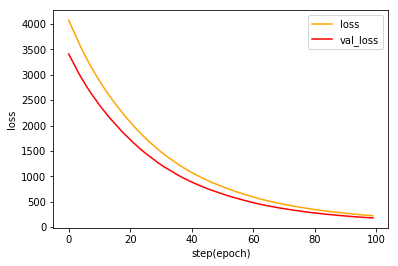

In [109]:
# Data List Initialize
loss_list = []
step_list = []
val_loss_list = []
for step in range(0, len(hist.history['loss'])):
    loss_list.append(hist.history['loss'][step])
    val_loss_list.append(hist.history['val_loss'][step])
    step_list.append(step)
    
# Visualization
plt.figure(1)
plt.plot(step_list, loss_list, color = 'orange', label = 'loss')
plt.plot(step_list, val_loss_list, color = 'red', label = 'val_loss')
plt.xlabel('step(epoch)')
plt.ylabel('loss')
plt.legend()

plt.show()

## 3. SGD의 구체화

2번에서는 sklearn, numpy, keras를 이용해서 SGD를 구현합니다.<br>
3번에서는 numpy 레벨에서만 구현합니다.

### 3.1. Numpy를 이용한 SGD 구체화

아래 코드는 선형회귀(Linear Regression)을 SGD로 구현합니다.

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


일단, Util Class를 정의합니다.

In [309]:
# Basic Settings
import numpy as np
import random # np.random

class SGDUtil:
    
    def __init__(self):
        pass
    
    @staticmethod
    def mse(w, x, y):
        t = (w[0] * x + w[1])
        return np.mean((y - t) ** 2) / (2 * len(x))
    
    @staticmethod
    def hill(x, y, t_w0, t_w1, g):
        w0 = np.linspace(t_w0 - g, t_w0 + g, 100)
        w1 = np.linspace(t_w1 - g, t_w1 + g, 100)
        x, y = np.array(x), np.array(y)

        J = np.zeros(shape = (len(w0), len(w1)))
        for i0 in range(len(w0)):
            for i1 in range(len(w1)):
                J[i0, i1] = SGDUtil.mse([w0[i0], w1[i1]], x, y)

        w0, w1 = np.meshgrid(w0, w1)

        return [w0, w1], J
    
    @staticmethod
    def make_regression(X_n):
        X = -3 + 13 * np.random.rand(X_n)
        Prm_c = [170, 108, 0.2] # parameter
        Y = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) \
        + 4 * np.random.randn(X_n)
        X, Y = np.array(X), np.array(Y)
        return X, Y
    
    @staticmethod
    def shuffle(x, y):
        seed = random.random()
        random.seed(seed)
        random.shuffle(x)
        random.seed(seed)
        random.shuffle(y)

### SGDUtil method description

**mse** 함수는 선형식에서의 오차함수를 의미합니다.

**hill** 함수는 고정된 x, y에서 기울기 $w_0$와 y절편 $w_1$를 다양한 범위내에서 loss를 계산해 meshgrid 값을 돌려줍니다. 특히, 반환값은 등고선을 그리는 데에 사용합니다.

**make_regression** 함수는 교재에서 사용되던 인공 데이터 생성 함수입니다.

**shuffle** 함수는 x와 y를 섞는 함수입니다. seed을 동일하게 하여 섞기 전과 섞은 후 대응되는 (x, y)는 여전하게 만듭니다.

SGD Class를 정의합니다.

In [310]:
# Basic Settings
import numpy as np
#import SGDUtil            # deactivate in jupyter notebook

class SGD:
    
    def __init__(self, x, y):
        self.x = (x - min(x)) / (max(x) - min(x))
        self.y = (y - min(y)) / (max(y) - min(y))
        pass
        
    def process(self, epoch, w, lr = 0.2):
        x, y = self.x, self.y
        step, w_list, loss_list, step_list = 1, [], [], []
        
        while(step <= epoch):
            SGDUtil.shuffle(x, y)
            loss = 0
            dw0, dw1 = 0.0, 0.0
            
            for i in range(len(x)):
                pre_y = w[0] * x[i] + w[1]
                loss = ((y[i] - pre_y) ** 2) / 2
                
                dw0 = (pre_y - y[i]) * x[i]
                dw1 = (pre_y - y[i])
                
                w[0] = w[0] - lr * dw0
                w[1] = w[1] - lr * dw1
                
                w_list.append([w[0], w[1]])
                loss_list.append(loss)
                step_list.append(step)
                
                step += 1
                
                if(step > epoch):
                    return {'w': w_list, 'loss': loss_list, 'step': step_list}

### SGD 작동 방식

Batch Gradient Descent에서는 모든 x에서의 $mse$를 구한 후, 1 step를 증가했다면

Stochastic Gradient Descent에서는 각 x에서의 평균을 구한 후, 1 step를 증가했습니다.

$w$의 업데이트 방식은 Batch Gradient Descent, Stochastic Gradient Descent, Mini-batch Gradient Descent 전부 동일합니다.

$$
f = w_0 x + w_1
$$

$$
\dfrac {\partial f} {\partial w_0} = x, \dfrac {\partial f} {\partial w_1} = 1
$$


$$
w_0 = w_0 - learning\_rate * \dfrac {\partial f} {\partial w_0}
$$

$$
w_1 = w_1 - learning\_rate * \dfrac {\partial f} {\partial w_1}
$$


## 4. 구체화한 모듈의 단위 테스트

SGDUtil 모듈과 SGD 모듈의 단위 테스트를 진행합니다.

### 4.1. Numpy를 이용한 SGD 단위 테스트

단위 테스트에 사용되는 인공 데이터는 직접 제작합니다.

또한, 단위 테스트의 결과를 `matplotlib 모듈`을 이용해 시각화합니다.

In [311]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
%matplotlib inline

SGDUtil Class의 `make_regression(X_n)`를 이용해 인공 데이터를 생성합니다. 일부러 seed를 정하지 않아 항상 값이 다르게 나옵니다.

In [312]:
# X, Y Data
#x = np.array([22, 15, 17, 31, 24, 28, 46, 45, 50])
#y = np.array([11, 34, 43, 49, 56, 74, 77, 91, 107])
x, y = SGDUtil.make_regression(30)

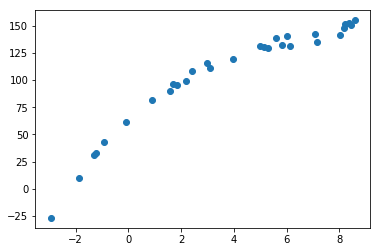

In [313]:
# X, Y Visualization
plt.figure(1)
plt.plot(x, y, marker='o', linestyle='None')
# linestyle='None' 선 제거
plt.show()

SGD 모듈 단위 테스트

In [314]:
sgd = SGD(x, y)
dict_result = sgd.process(epoch = 250, 
                          w = np.array([30., -40.]), lr = 0.2)

**loss_list**는 각 step마다 loss값이 저장되어 있습니다.

In [315]:
w_list = dict_result['w']
loss_list = dict_result['loss']
step_list = dict_result['step']

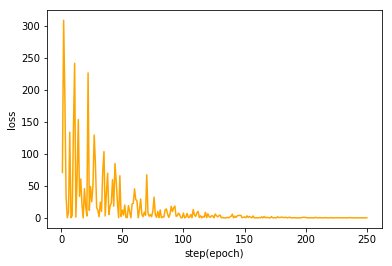

In [316]:
plt.figure(1)
plt.xlabel('step(epoch)')
plt.ylabel('loss')
plt.plot(step_list, loss_list, color = 'orange')

step-loss 그래프를 보게 되면, 초기 step에서는 loss가 굉장히 높은 것을 알 수 있지만, 갈수록 낮아지고 있습니다.

하지만, SGD 특성상, 안정성이 낮기 때문에, 초기에 많이 흔들리는 것을 볼 수 있습니다.

안정성이 낮은 이유는 loss update하는 데에 있어서, 변수 1개만 적용하기 때문입니다.

t_w0:  2.0200762496279485 t_w1:  -0.433411803967238 t_loss:  0.10517007835962683


Text(0,0.5,'$w_1$')

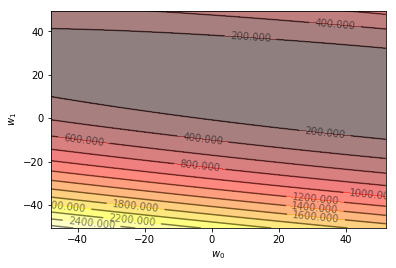

In [320]:
# contour로 표시

t_w0, t_w1 = w_list[len(w_list) - 1]
t_loss = loss_list[len(loss_list) - 1]
print("t_w0: ", t_w0, "t_w1: ", t_w1, "t_loss: ", t_loss)

hW, hJ = SGDUtil.hill(x, y, t_w0, t_w1, 50)
plt.figure(1)
plt.contourf(hW[0], hW[1], hJ, 15, alpha = 0.5, cmap = plt.cm.hot)
C = plt.contour(hW[0], hW[1], hJ, 15, alpha = 0.5, colors='black')
plt.clabel(C,inline=True)
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')

### 등고선의 해석

sgd.process로 작업한 w_list에서 가장 loss가 적은 $w_0, w_1$ 기준으로 $w_i \pm g$ 즉, $[w_i - g, w_i + g]$ 범위에서 하나하나 MSE를 계산해서 등고선으로 표시한 것입니다.

특히나, sgd.process로 작업해서 나온 t_w0, t_w1 를 등고선에서 보면 차이가 크다는 것을 알 수 있습니다.

왜냐하면, SGD에서는 loss를 계산할 때, $x_i$ 하나 가지고 계산을 했고, hill에서는 loss를 Batch Gradient Descent의 방식처럼 계산했기 때문입니다.

### 그렇다면, w_list 가지고 직선을 그릴 수 있을까?

가능은 하겠지만, 확률(Probability)이 낮습니다. 확률은 Epoch 값에 따라서 달라지기도 합니다.

Batch Gradient Descent보다 Local Optimal를 빠져나갈 수 있는 것은 **사실**이나, 안정성이 낮기 때문에, learning_rate와 epoch값에 따라서 오히려 안 좋은 값을 출력할 수도 있습니다.

그렇기 때문에, SGD의 변형으로 Momentum을 통해 더 좋은 값을 유도할 수 있습니다.

### 그렇다면, 어떻게 SGD의 성능을 보일 것인가?

여기서는, SGD의 성능을 로젠브룩(RosenBrock) 함수를 통해 보일 예정입니다.

사실상 'SGD의 성능'이라는 표현 보다는 `경사하강법(Gradient Descent)의 성능` 이라 보는 게 맞을 것 같습니다.

그 이유에 대해서는 아래 5번 문단에서 설명합니다.

## 5. Rosenbrock Function을 통한 SGD 성능 검증

Rosenbrock Function은 최적화 알고리즘을 테스트하는 용도로 사용하는 함수이다.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Rosenbrock_function.svg/600px-Rosenbrock_function.svg.png)

Rosenbrock Function은 다음과 같다.

$$
f(x, y) = (a - x) ^ 2 + b(y - x ^ 2) ^ 2
$$

$f(x, y) = 0$ 을 만족하기 위해서는 $(x = a, y = a ^ 2)$이 일반적이다.


### Rosenbrock Function을 회귀(Regression) 관점에서 바라본다면?

이 로젠브룩 함수를 회귀(Regression) 관점에서 바라본다면 선형회귀랑은 정반대의 결과가 나오게 됩니다.

선형회귀(Linear Regression)의 기억을 다시 복기해본다면,

**고정적인** X, Y 데이터에서 선형식을 유추했습니다.

선형식을 유추했다는 것은 $w_0(기울기), w_1(y절편)$ 를 알아내는 것과 동일합니다.

loss function은 MSE(Mean Square Error)을 사용했습니다.

하지만, 로젠브룩에서의 회귀(Regression)는 반대입니다.

**유동적인** $X, Y$ 데이터가 $f(X, Y) = 0$ 를 만족할 때까지 움직인다고 생각하면 됩니다.

---

여기서, 선형 회귀에서 X, Y는 1개이상인 반면, 로젠브룩에서의 회귀는 X, Y가 항상 1개씩입니다.

4번에서 언급했던 `SGD의 성능`을 Rosenbrock Function에서 검증하게 된다면, `Gradient Descent(경사하강법)의 성능`와 동일하다고 말한 부분이 있습니다.

**Batch Gradient Descent**는 데이터 $N$개에서 $N$개를 가지고 Loss를 계산하는 것이 1 step입니다.

**Mini-Batch Gradient Descent**는 데이터 $N$개에서 $K$개를 가지고 Loss를 계산하는 것이 1 step입니다. $(K \le N)$

**Stochastic Gradient Descent**는 데이터 $N$개에서 $1$개를 가지고 Loss를 계산하는 것이 1 step입니다.

하지만, Rosenbrock Function에서는 데이터가 결국은 1개이므로, $N = 1$이게 됩니다. 즉, **Batch Gradient Descent**, **Mini-batch Gradient Descent**, **Stochastic Gradient Descent**는 데이터 1개에서 항상 1개를 뽑게 됩니다.

결국은, 결과를 달리 하고 싶으면, SGD의 변형 알고리즘인 Momentum 등을 사용해야 합니다.

일단, SGD도 경사하강법이므로 Rosenbrock Function의 편미분값을 구해야 합니다.

$$
f(x, y) = (a - x) ^ 2 + b(y - x ^ 2) ^ 2
$$

$$
\dfrac {\partial \; f(x, y)} {\partial x} = (-2)(a - x) + 2b * (-2x) * (y - x^2)
$$

$$
\dfrac {\partial \; f(x, y)} {\partial x} = (-2)(a - x) + (-4bx) * (y - x^2)
$$

$$
\dfrac {\partial \; f(x, y)} {\partial y} = 2b * (y - x^2)
$$

여기서는, $a = 1, b = 2$ 적용하면 $f(1, 1) = 0$가 성립한다.

In [78]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
def rosenbrock(x, y):
    
    a, b = np.float(1.0), np.float(2.0)
    return (a - x) ** 2 + b * (y - x ** 2) ** 2

In [145]:
def d_rosenbrock(x, y):
    
    a, b = np.float(1.0), np.float(2.0)
    dx = (-2) * (a - x) + (-4 * b) * (y - x ** 2) * x
    dy = 2 * b * (y - x ** 2)
    return dx, dy

In [147]:
def rosenbrock_sgd(x, y, epoch, lr = 8e-4, eps = 1.0e-6):
    history_x, history_y = [], []
    step_list = []
    
    for step in range(epoch):

        mu = 1.4
        dx, dy = d_rosenbrock(x, y)
        xx = x - lr * mu * dx
        yy = y - lr * mu * dy
        
        history_x.append(xx)
        history_y.append(yy)
        step_list.append(step)
        
        x = xx
        y = yy
        
    return history_x, history_y, step_list

단위 테스트를 진행해봅니다.

In [148]:
x_list, y_list, step_list = \
rosenbrock_sgd(x = 5, y = -20, \
                epoch = 10000)

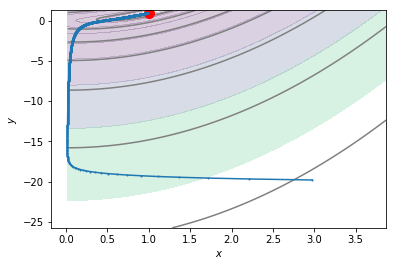

In [149]:
# Visualization

xx = np.linspace(min(x_list) * 1.3, max(x_list) * 1.3, 800)
yy = np.linspace(min(y_list) * 1.3, max(y_list) * 1.3, 600)
X, Y = np.meshgrid(xx, yy)
Z = rosenbrock(x = X, y = Y)

levels=np.logspace(-1, 3, 10)
plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="gray",
            levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=10)
plt.xlabel('$x$')
plt.ylabel('$y$')

# =============================

#for i in range(len(x_list)):
    #plt.plot(x_list[i], y_list[i], 'bo')
    
plt.plot(x_list, y_list, marker='o', markersize = 1)

RosenBrock Function에서 SGD 학습은 결국, Gradient Descent와 같아 속도는 여전히 느리고, Epoch가 10000번 근처에 도달하자 (1, 1)에 도달한 것을 알 수 있습니다.

### 소감

이번 최적화 알고리즘 구체화 프로젝트는 다양한 Gradient Descent Optimization에 대해서 개념만 아는 것이 아닌 직접 구현까지 하면서 왜 그렇게 구현해야 하는지 부터 시작해서 시각적으로 결과를 직접 보니 시간은 오래 걸리지만 이해가 쉬웠습니다.